In [2]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.mixture import GaussianMixture


Wczytaj zbiór danych Credit Card Default, który zawiera informacje o klientach bankowych,
takie jak saldo, limit kredytowy, płeć, wiek itp. Następnie oczyść dane poprzez usuwanie brakujących wartości i kodowanie zmiennych kategorycznych.

In [3]:
print("Zadanie 1")
df = pd.read_csv('UCI_Credit_Card.csv', sep=";",  decimal=',')
df.head()


has_na = df.isnull().any()
na_suma = df.isnull().sum()
#sprawdzam czy są wartości puste
print("Czy są wartości puste?\n", has_na)
print("\nLiczba pustych wartości", na_suma)

#gdyby istniały puste wartości-szukamy przyczyny braku-jeśli nie potrzebowaliśmy
df.dropna(inplace=True)

print("Liczba duplikatów", df.duplicated().sum())

#gdyby istniały duplikaty
df.drop_duplicates(inplace=True)


Zadanie 1
Czy są wartości puste?
 ID                            False
LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                         False
PAY_2                         False
PAY_3                         False
PAY_4                         False
PAY_5                         False
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default.payment.next.month    False
dtype: bool

Liczba pustych wartości ID                           

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
print(df.dtypes)


ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object


Nie ma sensu zmieniać już zakodowanych numerycznie jako liczby całkowite – czyli są to zmienne kategoryczne w postaci liczbowej

In [4]:
#gdby była inna sytuacji moglibyśmy
#df = pd.get_dummies(df, columns=['SEX', 'EDUCATION', 'MARRIAGE'], drop_first=True)
for col in ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    df[col] = df[col].replace(-1, 0)

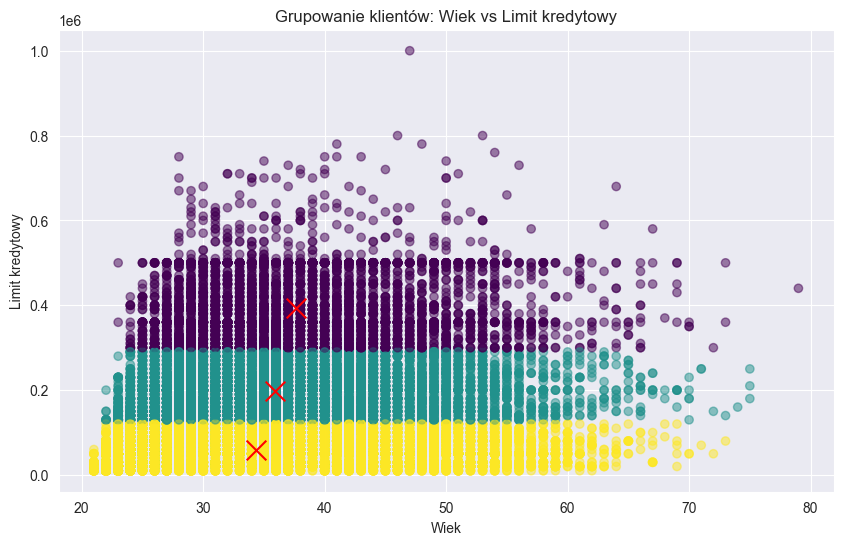

In [5]:
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df[['AGE', 'LIMIT_BAL']]

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
df['Cluster_AGE_LIMIT'] = labels

plt.figure(figsize=(10, 6))
plt.scatter(X['AGE'], X['LIMIT_BAL'], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='red')
plt.xlabel('Wiek')
plt.ylabel('Limit kredytowy')
plt.title('Grupowanie klientów: Wiek vs Limit kredytowy')
plt.grid(True)
plt.show()


In [1]:
print("Zadanie 3")

Zadanie 3



Zadanie 3 – Mean Shift vs K-means (pełne cechy)
Liczba klastrów (Mean Shift): 189
Liczba klastrów (K-means): 4
Silhouette score (Mean Shift): 0.1788
Silhouette score (K-means): 0.2502


C:\Users\Magda\AppData\Local\Temp\ipykernel_9372\3632644497.py:63: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


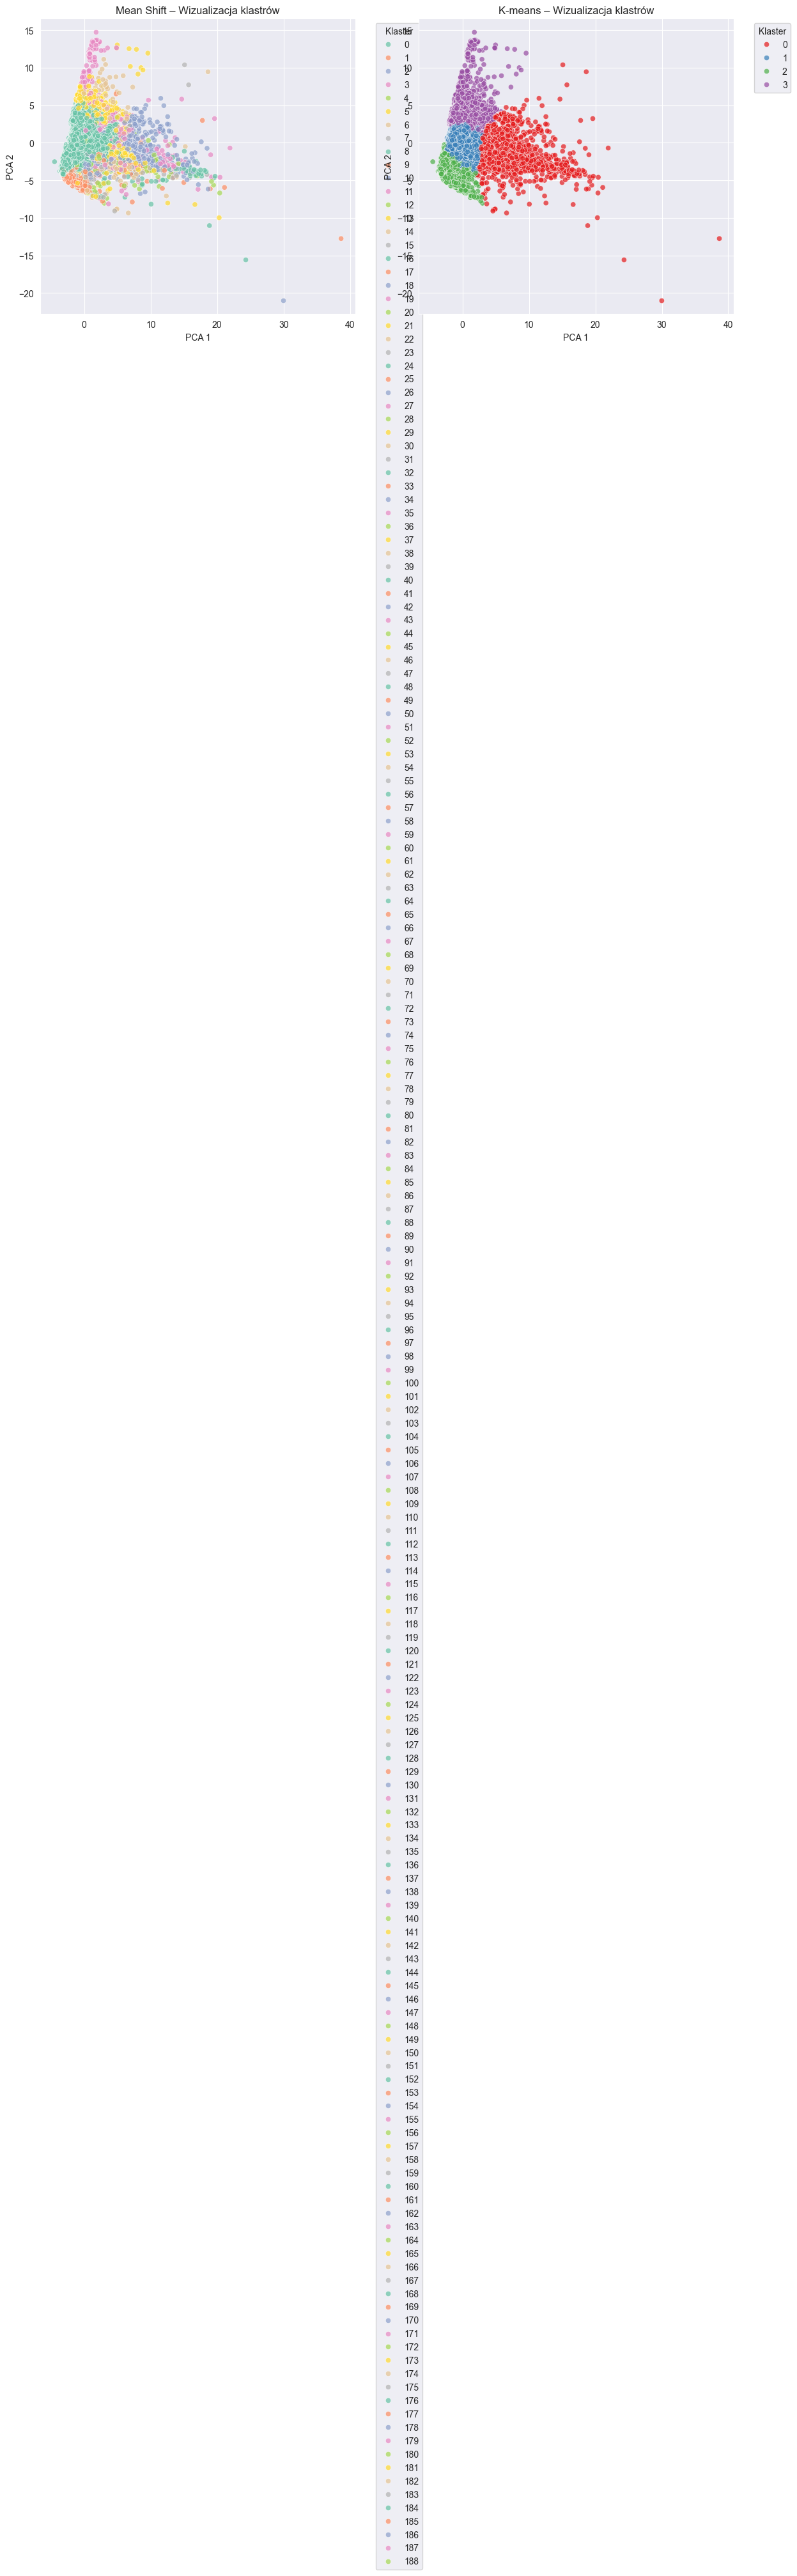


Liczba klientów w klastrach (Mean Shift):
MeanShift_Cluster
0      24196
1       1201
2        145
3        147
4         36
       ...  
184        3
185        2
186        1
187       46
188       12
Name: count, Length: 189, dtype: int64

Liczba klientów w klastrach (K-means):
KMeans_Cluster
0     3624
1    18587
2     4262
3     3527
Name: count, dtype: int64

Średnie cechy w klastrach (Mean Shift):
                   LIMIT_BAL   SEX  EDUCATION  MARRIAGE    AGE  PAY_0  PAY_2  \
MeanShift_Cluster                                                              
0                  146020.09  1.62       1.86      1.57  35.04   0.17   0.04   
1                  312797.67  1.59       1.62      1.38  39.65  -1.95  -1.99   
2                  245310.34  1.59       2.01      1.55  34.31  -0.01  -0.14   
3                   52108.84  1.48       2.08      1.61  34.15   2.92   2.94   
4                  304166.67  1.39       1.53      1.72  35.22   0.00   0.00   
...                      ...   

In [13]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

print("\nZadanie 3 – Mean Shift vs K-means (pełne cechy)")

# Skalowanie danych (bez ID)
# Bezpieczne usuwanie kolumny "ID", jeśli istnieje
df_features = df.drop(columns=[col for col in ["ID", "Cluster_AGE_LIMIT"] if col in df.columns])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)

# Redukcja wymiarów do 10 komponentów PCA dla Mean Shift
pca_reduction = PCA(n_components=10, random_state=42)
X_reduced = pca_reduction.fit_transform(X_scaled)

# Mean Shift
bandwidth = estimate_bandwidth(X_reduced, quantile=0.1, n_samples=1000)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_labels = ms.fit_predict(X_reduced)
df["MeanShift_Cluster"] = ms_labels

# KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
df["KMeans_Cluster"] = kmeans_labels

# Informacje o klastrach
print(f"Liczba klastrów (Mean Shift): {len(np.unique(ms_labels))}")
print(f"Liczba klastrów (K-means): {len(np.unique(kmeans_labels))}")

print(f"Silhouette score (Mean Shift): {silhouette_score(X_reduced, ms_labels):.4f}")
print(f"Silhouette score (K-means): {silhouette_score(X_scaled, kmeans_labels):.4f}")

# PCA do 2D do wizualizacji
pca_2d = PCA(n_components=2, random_state=42)
X_vis = pca_2d.fit_transform(X_scaled)
df["PCA1"] = X_vis[:, 0]
df["PCA2"] = X_vis[:, 1]

# Wizualizacja
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="MeanShift_Cluster", palette="Set2", alpha=0.7)
plt.title("Mean Shift – Wizualizacja klastrów")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title='Klaster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="KMeans_Cluster", palette="Set1", alpha=0.7)
plt.title("K-means – Wizualizacja klastrów")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title='Klaster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Liczba obserwacji w klastrach
print("\nLiczba klientów w klastrach (Mean Shift):")
print(df["MeanShift_Cluster"].value_counts().sort_index())

print("\nLiczba klientów w klastrach (K-means):")
print(df["KMeans_Cluster"].value_counts().sort_index())

# Średnie cechy w klastrach
print("\nŚrednie cechy w klastrach (Mean Shift):")
print(df.groupby("MeanShift_Cluster").mean(numeric_only=True).round(2))

print("\nŚrednie cechy w klastrach (K-means):")
print(df.groupby("KMeans_Cluster").mean(numeric_only=True).round(2))



Wykorzystaj metodę Mean Shift do identyfikacji naturalnych grup w danych Credit Card Default. Porównaj wyniki z algorytmem K-means i przeanalizuj, czy różnią się od siebie.

Zaimplementuj algorytm aglomeracyjnego klastrowania dla zbioru danych Iris, który zawiera
informacje o kwiatach irysów. Przeanalizuj strukturę klastrów i zinterpretuj wyniki.

In [25]:
from sklearn.datasets import load_iris
print("Zadanie 4")
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print(df.head(10))

X = iris.data
y = iris.target
ac = AgglomerativeClustering(n_clusters=3)
clusters = ac.fit(X)


Zadanie 4
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
5                5.4               3.9                1.7               0.4
6                4.6               3.4                1.4               0.3
7                5.0               3.4                1.5               0.2
8                4.4               2.9                1.4               0.2
9                4.9               3.1                1.5               0.1


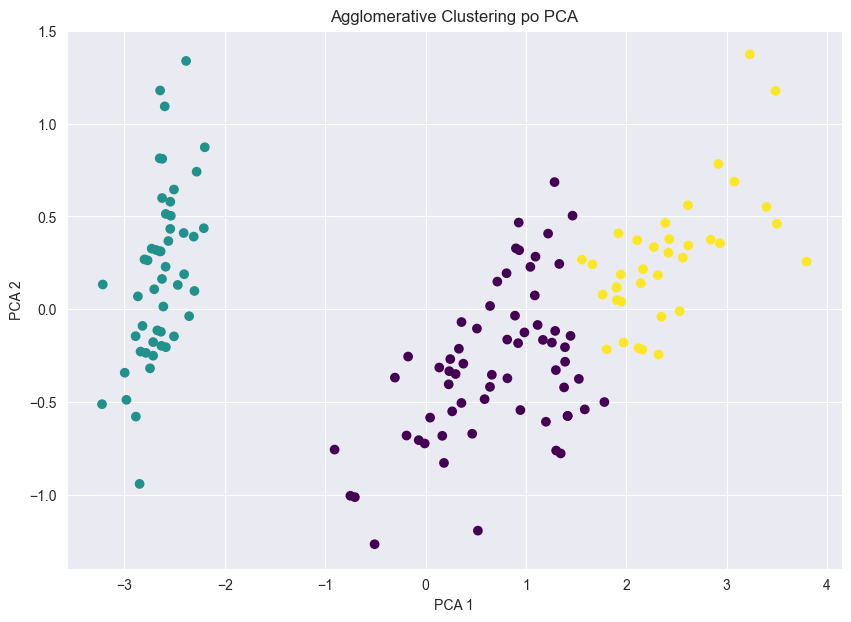

In [23]:
#ponieważ są 3 gatunki 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=ac.labels_, cmap='viridis')
plt.title('Agglomerative Clustering po PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

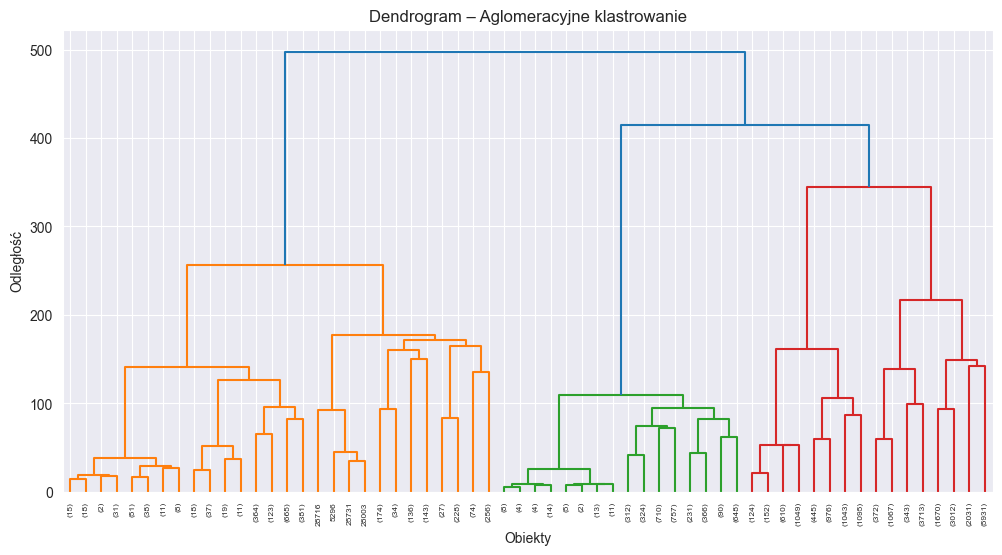

In [24]:
from scipy.cluster.hierarchy import linkage, dendrogram

linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Dendrogram – Aglomeracyjne klastrowanie")
plt.xlabel("Obiekty")
plt.ylabel("Odległość")
plt.show()

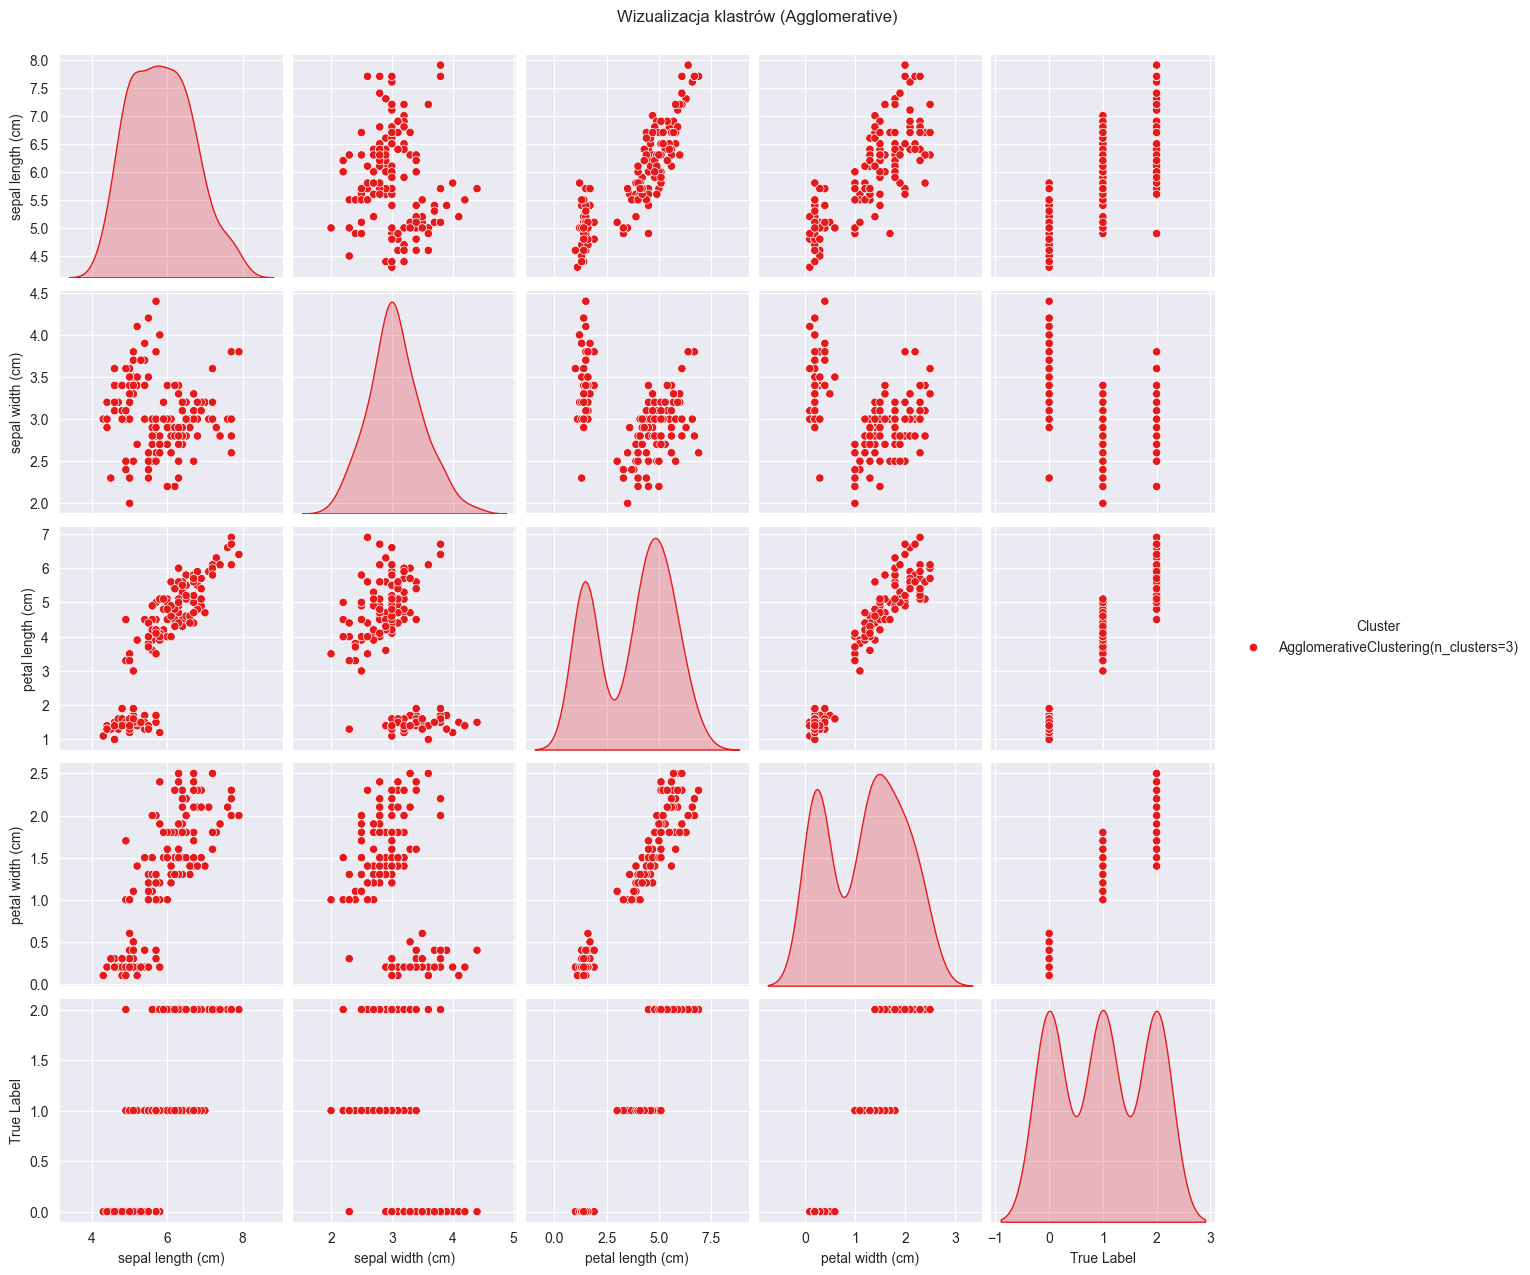

In [27]:
df["Cluster"] = clusters
df["True Label"] = y

# Pairplot
sns.pairplot(df, hue="Cluster", diag_kind="kde", palette="Set1")
plt.suptitle("Wizualizacja klastrów (Agglomerative)", y=1.02)
plt.show()


In [18]:
#analizujemy strukture klastów 
score = silhouette_score(X, labels)
print(f"Silhouette score:",score)
db_index = davies_bouldin_score(X, labels)
print(f"Davies-Bouldin index", db_index)

Silhouette score: 0.6176342352559346
Davies-Bouldin index 0.5023964332064345


Wyniki mówia nam że jest to średnia jakość klasteryzacji

In [28]:
print("Zadanie 5")

Zadanie 5


Zastosuj mieszane modele rozkładów Gaussa (GMM) do grupowania danych Wine, które zawierają informacje o parametrach chemicznych różnych win. Oceń skuteczność modelu i dokonaj interpretacji wyników.

In [28]:
from sklearn.datasets import load_wine
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
print(df.head(10))
print(set(wine.target))
X = wine.data
y = wine.target

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   
5    14.20        1.76  2.45               15.2      112.0           3.27   
6    14.39        1.87  2.45               14.6       96.0           2.50   
7    14.06        2.15  2.61               17.6      121.0           2.60   
8    14.83        1.64  2.17               14.0       97.0           2.80   
9    13.86        1.35  2.27               16.0       98.0           2.98   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.

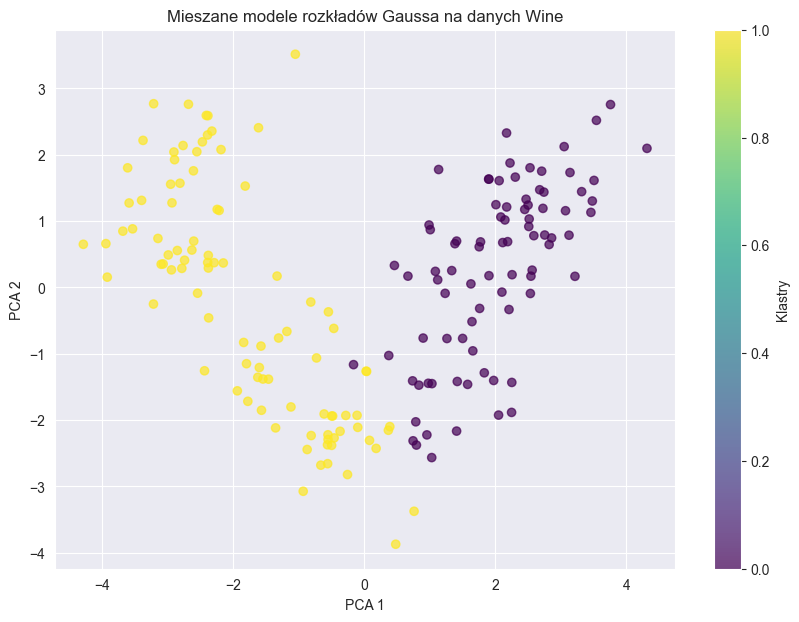

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

gmm = GaussianMixture(n_components=2)
gmm.fit(X_scaled)
labels = gmm.predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_gmm = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])
df_gmm["Cluster"] = labels
df_gmm["True Label"] = y

# Wizualizacja
plt.figure(figsize=(10, 7))
plt.scatter(df_gmm["PCA1"], df_gmm["PCA2"], c=df_gmm["Cluster"], cmap='viridis', alpha=0.7)
plt.title('Mieszane modele rozkładów Gaussa na danych Wine')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Klastry')
plt.grid(True)
plt.show()

In [33]:
#sprawdzenie jakość rozdzielenia
score = silhouette_score(X_scaled, labels)
print(f"Silhouette score:",score)
db_index = davies_bouldin_score(X_scaled, labels)
print(f"Davies-Bouldin index", db_index)

Silhouette score: 0.25822650257050495
Davies-Bouldin index 1.5277202305852162


Wyniki pierwszy nie zachwyca, mówi on o tym, że stnieje pewien stopień separacji między klastrami, ale nie jest on idealny. Wartość Davies'a Bouldiena wskazuje, że klastry są stosunkowo dobrze oddzielone-dziwna wartość

GMM daje pewne podstawy do rozróżnienia win na różne grupy, ale wyniki wskazują również na pewne nakładające się dane

In [ ]:
print("Zadanie 6")

Wykorzystaj algorytm DBSCAN do klastrowania danych zawierających obrazy twarzy z zestawu danych Olivetti Faces. Po przeprowadzeniu klastrowania zwizualizuj uzyskane klastry i
zinterpretuj znalezione grupy twarzy. Zwróć uwagę na nietypowe wzorce, które mogą być identyfikowane przez DBSCAN jako odosobnione punkty lub klastry.

In [11]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
X = faces.data  
images = faces.images 

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Magda\scikit_learn_data


In [36]:
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()
X = faces.data  
images = faces.images
true_labels = faces.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_pca = PCA(n_components=50, random_state=42).fit_transform(X_scaled)
X_tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X_pca)

dbscan = DBSCAN(eps=5, min_samples=5)
clusters = dbscan.fit_predict(X_tsne)


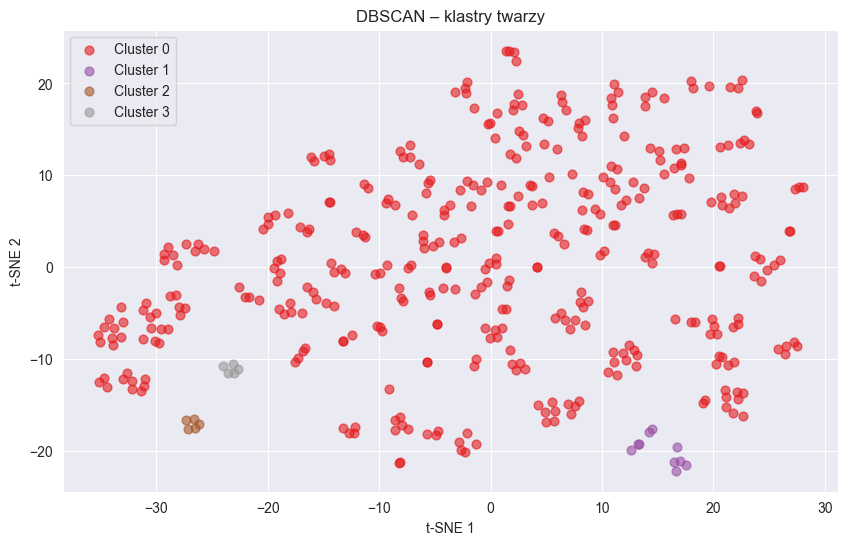

In [37]:
plt.figure(figsize=(10, 6))
unique_labels = np.unique(clusters)
colors = plt.cm.Set1(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    mask = clusters == label
    plt.scatter(X_tsne[mask, 0], X_tsne[mask, 1], s=40, color=color,
                label=f"Cluster {label}" if label != -1 else "Noise", alpha=0.6)

plt.legend()
plt.title("DBSCAN – klastry twarzy")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid(True)
plt.show()

# Przykładowe twarze 
def plot_faces(indices, title):
    n = len(indices)
    plt.figure(figsize=(10, 2))
    for i, idx in enumerate(indices):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[idx], cmap='gray')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()


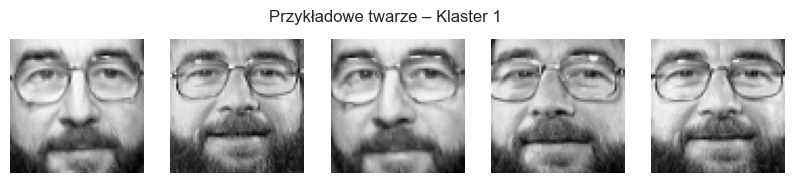

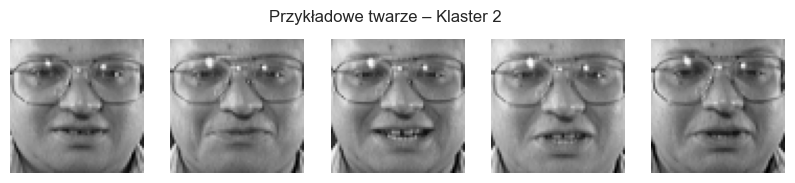

In [39]:
#twarze z wybranego klastra (np. 0) i outliery (-1)
for label in [1, 2, -1]:
    indices = np.where(clusters == label)[0][:5]
    if len(indices) > 0:
        title = f"Przykładowe twarze – Klaster {label}" if label != -1 else "Outliery (Noise)"
        plot_faces(indices, title)

In [41]:
from sklearn.datasets import load_diabetes

print("Zadanie 7")


diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Zadanie 7


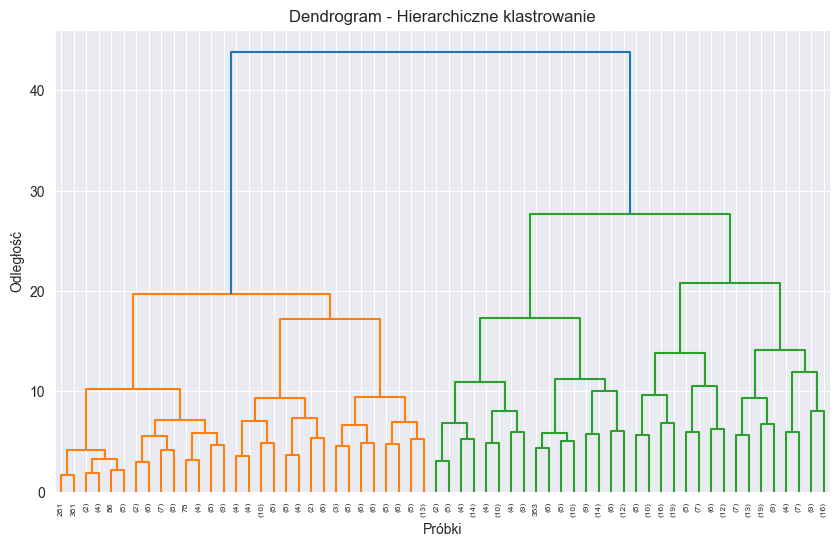

In [42]:
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = agglo.fit_predict(X_scaled)
X['Cluster'] = clusters

linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrogram - Hierarchiczne klastrowanie')
plt.xlabel('Próbki')
plt.ylabel('Odległość')
plt.show()

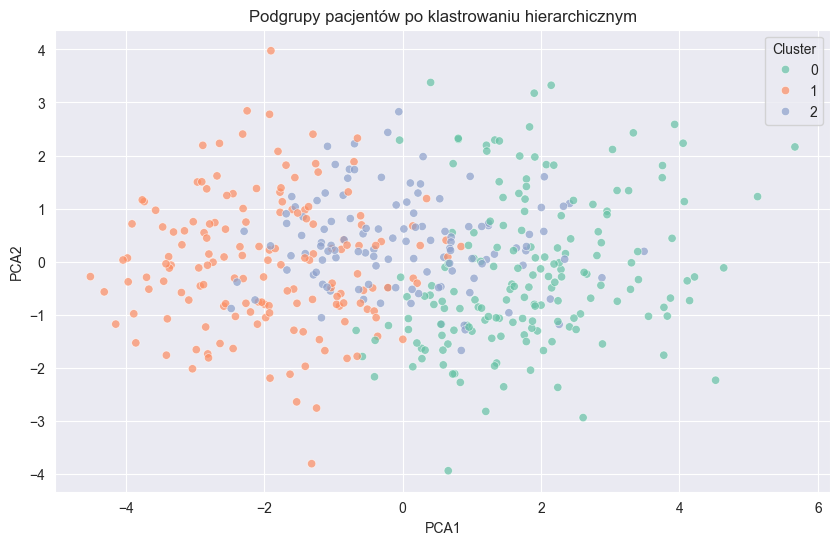

Średnie cech w klastrach:
              age       sex       bmi        bp        s1        s2        s3  \
Cluster                                                                         
0        0.018586  0.034698  0.020107  0.020360  0.026477  0.029999 -0.030240   
1       -0.014978 -0.003356 -0.036707 -0.025085 -0.030464 -0.033955  0.031920   
2       -0.006377 -0.044642  0.020383  0.004561  0.003060  0.002721  0.000326   

               s4        s5        s6      PCA1      PCA2  
Cluster                                                    
0        0.041174  0.031329  0.021518  1.824323 -0.219892  
1       -0.040918 -0.036260 -0.024796 -1.944661 -0.023031  
2       -0.003831  0.003906  0.002538  0.005506  0.341846  


In [44]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X['PCA1'] = X_pca[:, 0]
X['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=X, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', alpha=0.7)
plt.title('Podgrupy pacjentów po klastrowaniu hierarchicznym')
plt.show()

print("Średnie cech w klastrach:")
print(X.groupby('Cluster').mean())